In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [2]:
lcn = pd.read_csv(r"D:\Datasets\LungCapData.csv")

In [3]:
lcn.head

<bound method NDFrame.head of      LungCap  Age  Height Smoke  Gender Caesarean
0      6.475    6    62.1    no    male        no
1     10.125   18    74.7   yes  female        no
2      9.550   16    69.7    no  female       yes
3     11.125   14    71.0    no    male        no
4      4.800    5    56.9    no    male        no
..       ...  ...     ...   ...     ...       ...
720    5.725    9    56.0    no  female        no
721    9.050   18    72.0   yes    male       yes
722    3.850   11    60.5   yes  female        no
723    9.825   15    64.9    no  female        no
724    7.100   10    67.7    no    male        no

[725 rows x 6 columns]>

In [4]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [5]:
# DATA cleaning 

lcn.Smoke = lcn.Smoke.replace({'no': 1 , "yes" :1})
lcn.Caesarean = lcn.Caesarean.replace({'no': 1 , "yes" :1})
lcn.Gender = lcn.Gender.replace({'male': 1 , "female" :1})

In [6]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,1,1,1
1,10.125,18,74.7,1,1,1
2,9.550,16,69.7,1,1,1
3,11.125,14,71.0,1,1,1
4,4.800,5,56.9,1,1,1


In [7]:
# Data Sampling

from sklearn.model_selection import train_test_split
lcn_train , lcn_test = train_test_split(lcn , test_size = .2)

In [8]:
lcn_train_x = lcn_train.iloc[: ,1:]
lcn_train_y = lcn_train.iloc[ : , 0]

In [9]:
lcn_test_x = lcn_test.iloc[: ,1:]
lcn_test_y = lcn_test.iloc[ : , 0]

In [12]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [13]:
linreg.fit(lcn_train_x , lcn_train_y )   #model has been created

LinearRegression()

In [14]:
# model has been build on above line now lets try to interpret and judge performance of it

In [15]:
Rsquare = linreg.score(lcn_train_x , lcn_train_y)   #Rsquare 
Rsquare

0.8470180921155734

In [16]:
lcn_train_x.shape  # to find n = 580 , k= 5

(580, 5)

In [17]:
lcn_train_x.shape[0]

580

In [18]:
lcn_train_x.shape[1]

5

In [19]:
#Adjusted Rsquare 
N = lcn_train_x.shape[0]
K = lcn_train_x.shape[1]

AdjRsquare =  1 - (( 1 - Rsquare ) * (N - 1) / ( N - K -1))
AdjRsquare

0.8456854970991585

In [20]:
lcn_train_x.head(1)

,Age,Height,Smoke,Gender,Caesarean
616,15,76.6,1,1,1


In [21]:
linreg.coef_    # Beta values

array([0.14240659, 0.27392755, 0.        , 0.        , 0.        ])

In [22]:
linreg.intercept_  # intercept value i.e B0 where {y=B0 +B1x1}

-11.638534012511364

In [23]:
# lets do the prediction

pred_train = linreg.predict(lcn_train_x)
pred_test = linreg.predict(lcn_test_x)

In [24]:
pred_train.shape

(580,)

In [25]:
pred_test.shape

(145,)

In [26]:
# error 

error_train = lcn_train_y - pred_train
error_test = lcn_test_y = pred_test

In [27]:
#lets check the assumptions on the train data

In [28]:
np.mean(error_train)

2.465460785719313e-16

(array([ 1.,  0.,  1.,  4.,  8.,  2.,  5., 11., 13., 24., 28., 27., 40.,
        53., 42., 46., 45., 35., 46., 39., 27., 18., 25., 17.,  6.,  9.,
         4.,  1.,  1.,  2.]),
 array([-3.43000595, -3.21207101, -2.99413607, -2.77620114, -2.5582662 ,
        -2.34033126, -2.12239632, -1.90446139, -1.68652645, -1.46859151,
        -1.25065657, -1.03272164, -0.8147867 , -0.59685176, -0.37891682,
        -0.16098189,  0.05695305,  0.27488799,  0.49282292,  0.71075786,
         0.9286928 ,  1.14662774,  1.36456267,  1.58249761,  1.80043255,
         2.01836749,  2.23630242,  2.45423736,  2.6721723 ,  2.89010724,
         3.10804217]),
 <BarContainer object of 30 artists>)

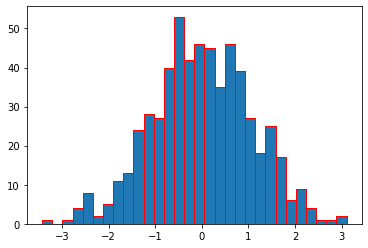

In [29]:
plt.hist(error_train , bins =30 , edgecolor ="r")

In [30]:
pred_actual = pd.DataFrame({"Actual":lcn_train_y , "Predicted" :pred_train})
pred_actual.head()

,Actual,Predicted
616,10.675,11.480415
241,9.950,9.968371
665,7.825,7.426466
133,8.600,6.533391
689,4.700,4.588684


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

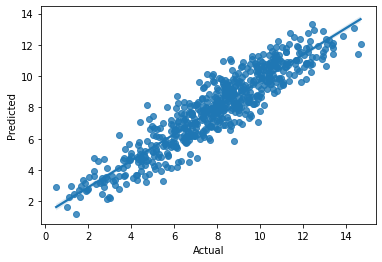

In [31]:
sn.regplot('Actual' ,'Predicted', data = pred_actual )

In [32]:
# MAPE on test data
mape_test = np.mean(np.abs(error_test / lcn_test_y) *100)
mape_test

100.0

In [33]:
Acc = 100 - mape_test
Acc

0.0

In [34]:
#PS : Property price train where Price is a Target variable i.e B0



In [35]:
prop = pd.read_csv(r"D:\Datasets\Property_Price_Train.csv")

In [36]:
prop.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
pd.options.display.max_rows = None

In [38]:
prop.isnull().sum()

Id                              0
Building_Class                  0
Zoning_Class                    0
Lot_Extent                    259
Lot_Size                        0
Road_Type                       0
Lane_Type                    1368
Property_Shape                  0
Land_Outline                    0
Utility_Type                    0
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     0
Exterior2nd                     0
Brick_Veneer_Type               8
Brick_Veneer_Area               8
Exterior_Material               0
Exterior_Condition              0
Foundation_Typ

In [39]:
prop.isnull().sum() * 100 / prop.shape[0]

Id                            0.000000
Building_Class                0.000000
Zoning_Class                  0.000000
Lot_Extent                   17.751885
Lot_Size                      0.000000
Road_Type                     0.000000
Lane_Type                    93.762851
Property_Shape                0.000000
Land_Outline                  0.000000
Utility_Type                  0.000000
Lot_Configuration             0.000000
Property_Slope                0.000000
Neighborhood                  0.000000
Condition1                    0.000000
Condition2                    0.000000
House_Type                    0.000000
House_Design                  0.000000
Overall_Material              0.000000
House_Condition               0.000000
Construction_Year             0.000000
Remodel_Year                  0.000000
Roof_Design                   0.000000
Roof_Quality                  0.000000
Exterior1st                   0.000000
Exterior2nd                   0.000000
Brick_Veneer_Type        

In [40]:
prop.columns[prop.isnull().sum() * 100 / prop.shape[0] > 40]  # nulls more than 40%, we drop this columns in the next step

Index(['Lane_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature'],
      dtype='object')

In [41]:
prop = prop.drop(['Lane_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality','Miscellaneous_Feature', 'Id'] , axis =1)

In [42]:
prop.shape

(1459, 75)

In [43]:
prop.columns[ prop.isnull().sum() > 0]

Index(['Lot_Extent', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical_System', 'Garage',
       'Garage_Built_Year', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition'],
      dtype='object')

In [44]:
prop.Lot_Extent.fillna(prop.Lot_Extent.mean() , inplace = True)
prop.Brick_Veneer_Type.fillna( 'None' , inplace = True)
prop.Brick_Veneer_Area.fillna(prop.Brick_Veneer_Area.mean() , inplace = True )
prop.Basement_Height.fillna( 'TA' , inplace = True)
prop.Basement_Condition.fillna('TA' , inplace = True)
prop.Exposure_Level.fillna('NO' , inplace = True)
prop.BsmtFinType1.fillna('Unf' , inplace = True)
prop.BsmtFinType2.fillna('Unf' , inplace = True)
prop.Electrical_System.fillna('SBrkr' , inplace = True)
prop.Garage.fillna('Attcd' , inplace = True)
prop.Garage_Built_Year.fillna(prop.Garage_Built_Year.mean() , inplace = True)
prop.Garage_Finish_Year.fillna('Unf' , inplace = True)
prop.Garage_Quality.fillna('TA' , inplace = True)
prop.Garage_Condition.fillna('TA' , inplace = True)

In [45]:
prop.columns [prop.isnull().sum() > 0]

Index([], dtype='object')

In [46]:
prop.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,65.0,8450,Paved,Reg,Lvl,AllPub,I,GS,...,20.337934,0,0,0,0,2,2008,WD,Normal,208500
1,20,RLD,80.0,9600,Paved,Reg,Lvl,AllPub,FR2P,GS,...,15.039392,0,0,0,0,5,2007,WD,Normal,181500
2,60,RLD,68.0,11250,Paved,IR1,Lvl,AllPub,I,GS,...,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,70,RLD,60.0,9550,Paved,IR1,Lvl,AllPub,C,GS,...,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RLD,84.0,14260,Paved,IR1,Lvl,AllPub,FR2P,GS,...,21.788818,0,0,0,0,12,2008,WD,Normal,250000


In [47]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   object 
 2   Lot_Extent                 1459 non-null   float64
 3   Lot_Size                   1459 non-null   int64  
 4   Road_Type                  1459 non-null   object 
 5   Property_Shape             1459 non-null   object 
 6   Land_Outline               1459 non-null   object 
 7   Utility_Type               1459 non-null   object 
 8   Lot_Configuration          1459 non-null   object 
 9   Property_Slope             1459 non-null   object 
 10  Neighborhood               1459 non-null   object 
 11  Condition1                 1459 non-null   object 
 12  Condition2                 1459 non-null   object 
 13  House_Type                 1459 non-null   objec

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
prop[prop.select_dtypes(include=['object']).columns ] = prop[prop.select_dtypes(include=['object']).columns ].apply(le.fit_transform)  

In [50]:
# all abject convert into Intergers(numeric values)



In [51]:
#sampling
from sklearn.model_selection import train_test_split
prop_train , prop_test = train_test_split(prop , test_size = .2)

In [52]:
prop_train_x = prop_train.iloc[ : , 0 : -1]
prop_train_y = prop_train.iloc[ : , -1]

In [53]:
prop_test_x = prop_test.iloc[ : , 0 : -1]
prop_test_y = prop_test.iloc[ : , -1]

In [54]:
from sklearn.linear_model import LinearRegression
reg_prop = LinearRegression()

In [55]:
reg_prop.fit(prop_train_x , prop_train_y ) 

LinearRegression()

In [56]:
Rsquare = reg_prop.score(prop_train_x , prop_train_y)
Rsquare

0.8570719121095368

In [57]:
#Adjusted Rsquare 
N = prop_train_x.shape[0]
K = prop_train_x.shape[1]

AdjRsquare =  1 - (( 1 - Rsquare ) * (N - 1) / ( N - K -1))
AdjRsquare

0.8473863090839926

In [58]:
reg_prop.intercept_

1015798.593109186

In [59]:
reg_prop.coef_

array([-1.18844521e+02, -1.97651960e+03, -1.37499882e+02,  3.69948182e-01,
        1.27254878e+04, -5.90241279e+02,  3.10161752e+03, -5.44850467e+04,
       -2.00161484e+02,  5.52904201e+03,  4.61528122e+02, -1.27304091e+03,
       -1.14826509e+04, -2.12865390e+03, -1.62549909e+03,  1.06066396e+04,
        4.54411506e+03,  1.75093799e+02,  4.24195310e+01,  1.08791245e+03,
        2.88583779e+04, -1.61714427e+03,  9.30507643e+02,  4.25987150e+03,
        3.91473138e+01, -9.12537057e+03,  7.09151584e+02,  1.36654017e+03,
       -9.08744270e+03,  2.56853783e+03, -3.25748882e+03, -1.02125009e+03,
        4.33430998e+00,  1.47385264e+03,  3.82648054e+00, -1.31260481e+00,
        6.84818576e+00, -3.08031924e+03, -1.14275375e+03, -2.29560606e+03,
       -9.26299003e+02,  1.56711531e+01,  1.48420476e+01, -7.39052108e+00,
        2.31226796e+01,  7.68265767e+03,  5.39592026e+03,  4.96582017e+03,
        7.86462732e+02, -2.69283781e+03, -1.43669153e+04, -8.47100516e+03,
        4.30206343e+03,  

In [60]:
# check assumptions

In [61]:
prop_train = reg_prop.predict(prop_train_x)
prop_test = reg_prop.predict(prop_test_x)

In [62]:
err_train = prop_train_y - prop_train
err_test = prop_test_y - prop_test

In [63]:
np.mean(err_train)

-1.3696507015285476e-10

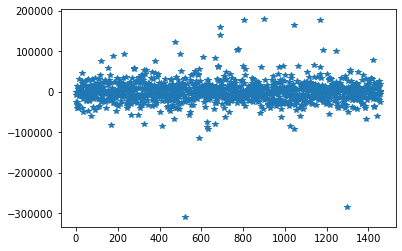

In [64]:
plt.plot(err_train , "*")   # Outliers are their

(array([  1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   9.,  30.,
        219., 521., 291.,  61.,  15.,   9.,   1.,   1.,   5.]),
 array([-308840.60476802, -284442.11990249, -260043.63503696,
        -235645.15017143, -211246.6653059 , -186848.18044037,
        -162449.69557484, -138051.21070931, -113652.72584378,
         -89254.24097825,  -64855.75611272,  -40457.27124719,
         -16058.78638166,    8339.69848387,   32738.1833494 ,
          57136.66821493,   81535.15308046,  105933.63794599,
         130332.12281152,  154730.60767705,  179129.09254258]),
 <BarContainer object of 20 artists>)

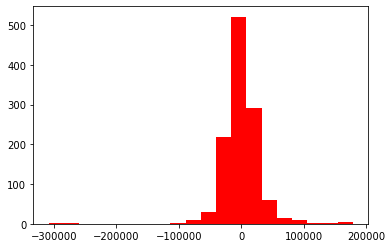

In [65]:
plt.hist(err_train , bins = 20 , color = 'r')

In [66]:
prop_actual = pd.DataFrame({'Predict' : prop_train , 'Actual' : prop_train_y})
prop_actual.head()

,Predict,Actual
681,96622.757372,159434
1206,107929.732541,107000
918,271141.194863,238000
769,435257.127469,538000
389,388866.015156,426000


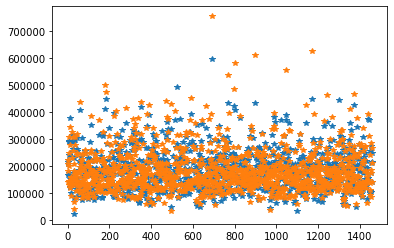

In [67]:
plt.plot(prop_actual , "*")

In [68]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual', ylabel='Predict'>

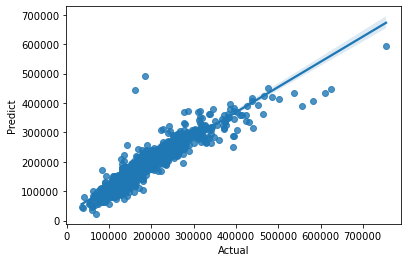

In [69]:
sns.regplot('Actual', 'Predict' , data = prop_actual)

In [70]:
# MAPE on test data
mape_test = np.mean(np.abs(err_test / prop_test_y) *100)
mape_test

11.371793793630818

In [71]:
Accuracy = 100 -mape_test
Acc = Accuracy 
Acc

88.62820620636919

In [72]:
# TO REMOVE OUTLIERS

def remove_outliers(df,   col,  k):   
        mean = df[col].mean()
        global df1  # output 
        sd = df[col].std()    
        final_list = [x for x in df[col] if (x > mean - k * sd)]
        final_list = [x for x in final_list if (x < mean + k * sd)]       
        df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)     
        print("Number of outliers removed == >"   ,  df.shape[0]  - df1.shape[0])

In [73]:
remove_outliers(prop , 'Sale_Price' , 2)

(1396, 75)
Number of outliers removed == > 63


In [74]:
prop.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,3,3,0,4,0,...,20.337934,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,15.039392,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,-46.232198,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,60.921821,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,21.788818,0,0,0,0,12,2008,8,4,250000


In [75]:
prop = df1  # outliers are removered and assign df1 to prop to reassign then re run program from sampling i.e form iloc function